# Week 7 Lab Partial Solution

CS5014 Machine Learning

University of St Andrews

## Aims

The aim of today's session is to reinforce your understanding of EM algorithm. The questions and code is closely related to Practical 2. Due to time limit, you should try to finish as many questions as you can before attending the tutorial session.

## Setting up

Activate your python virtual environment (see Lab1 slides for instructions). 

In [20]:
%matplotlib inline
%config Completer.use_jedi = False
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.special import logsumexp
from scipy.stats import multivariate_normal as mvn
import numpy.linalg as linalg
from sklearn.metrics.cluster import normalized_mutual_info_score

Set a random generator with a fixed seed to have roughly the same result everytime

In [21]:
# use fixed random number generator seed to have reproducible results
random_seed = 123
rng = np.random.default_rng(random_seed)

You may want to use the following method to scatter plot a dataset.

In [22]:
def plot_mixGaussian_data(data, zs, title=""):
    plt.figure()
    plt.title(title)
    for k in np.unique(zs):
        fig = plt.scatter(data[zs==k,0], data[zs==k,1], marker='.')
    fig.axes.set_aspect(1)
    return(fig)

In [23]:
# to type μ: "\" + "mu" + tab 
μ1 = [-2, 1]
Σ1 = [[0.5, 0.25], [0.25, 0.5]]
μ2 = [2, 1]
Σ2 = [[0.5, -0.25], [-0.25, 0.5]]
μ3 = [0, -1]
Σ3 = [[0.75, 0], [0, 2]]
# randomly sample 100 observations from three multivariate Guassians 
toy_D_1 = rng.multivariate_normal(μ1, Σ1, 100)
toy_D_2 = rng.multivariate_normal(μ2, Σ2, 100)
toy_D_3 = rng.multivariate_normal(μ3, Σ3, 100)
# stack them together
toy_D = np.concatenate((toy_D_1, toy_D_2, toy_D_3), axis=0)
# generate the labels
toy_labels = np.repeat(np.arange(3), 100)

In [24]:
# plot_mixGaussian_data(toy_D, toy_labels, "")

## Task 1. Randomly sample from a mixture of Gaussians

Write a method that randomly generates samples from a finite mixture of Gaussians. Remember the definition of a finite mixture of Gaussians is 
$$p(x) = \sum_{k=1}^K \pi_k N(x; \mu_k, \Sigma_k).$$

* $\pi_k$ is our prior belief on the (unobserved) labels $p(z^i =k) = \pi_k$
* and $N(\mu_k, \Sigma_k)$ denotes a multivariate Gaussian distribution with mean and covariance $\mu_k,\Sigma_k$

And recall the data generating process of a mixture model: for each observation $(z^i, x^i)$
1. randomly sample $z^i \sim p(z^i)$
2. randomly sample $x^i \sim N(\mu_{z^i}, \Sigma_{z^i})$

The method should have
**input** 
* `πs`: the prior mixture proportion $\pi_k$ for $k=1,\ldots, K$;
* `μs, Σs`: $K$ set of Gaussians' parameters;
* `n`: number of samples to generate

and **output**
* `samples`: the gererated samples, should be a n by d matrix
* `zs`: the true cluster labels, where each $z_i \in 1, 2\ldots, K$ is the index of the cluster that has generated the i-th sample.



Once you have done so, use the implemented method to sample `n=800` samples from a ($K=3$) mixture of Gaussians with following parameters:
* $\pi = [0.25, 0.25, 0.5]$
* $\mu_1 = [-2, 1] , \Sigma_1 = \begin{bmatrix} 0.5 & 0.25 \\ 0.25 & 0.5\end{bmatrix}$; $\mu_2 = [2, 1] , \Sigma_2 = \begin{bmatrix} 0.5 & -0.25 \\ -0.25 & 0.5\end{bmatrix}$; $\mu_3 = [0, -1] , \Sigma_3 = \begin{bmatrix} 0.75 & 0 \\ 0 & 2\end{bmatrix}$

In [25]:
# rng: a random number generator
def sample_mix_mvns(πs, μs, Σs, n, rng):
    K, dim = μs.shape
    samples = np.zeros((n, dim))
    zs = rng.choice(K, n, p=πs)
    # fill the missing steps here !
    for i in range(n):
        #  samples[i, :] = rng.multivariate_normal(μs[zs[i],:], Σs[zs[i],:,:], 1)[0,:]
        samples[i, :] = rng.multivariate_normal(μs[zs[i],:], Σs[zs[i],:,:])
    return samples, zs

# to type μ: type \mu + tab; \kappa + tab for κ 
trueπs = np.array([0.25, 0.25, 0.5])
trueμs = np.array([μ1, μ2, μ3])
trueΣs = np.array([Σ1, Σ2, Σ3])
n_size = 800
# use the random generator rng with a fixed seed
simData, simData_labels = sample_mix_mvns(trueπs, trueμs, trueΣs, n_size, rng)
# you may want to plot the dataset here to visualise the dataset
# plot_mixGaussian_data(simData, simData_labels, "")
print(simData)
print(simData_labels)

[[ 2.13731581  1.79280696]
 [-0.12611021 -4.44074408]
 [-1.56860903  1.71975027]
 ...
 [-0.37179766 -1.32669441]
 [-0.66487317  1.70566506]
 [-0.07495353 -1.11029219]]
[1 2 0 1 0 0 0 1 1 1 1 2 0 1 2 2 2 1 2 2 0 2 0 2 2 2 0 1 1 2 2 2 0 2 1 1 0
 1 1 1 1 2 2 2 2 2 2 0 0 1 0 0 2 2 0 2 1 0 2 2 2 2 2 1 2 2 0 0 0 2 2 1 2 2
 0 2 1 1 0 1 0 2 2 2 0 2 1 1 2 1 2 1 0 2 2 0 1 2 0 0 2 0 1 1 2 1 0 0 2 2 0
 1 2 2 2 0 2 2 2 0 1 1 2 2 2 2 2 1 2 1 1 2 2 1 0 0 2 0 2 2 0 1 1 2 2 2 0 1
 1 2 1 1 2 2 2 1 2 1 2 2 1 1 0 0 0 2 2 0 2 1 2 2 2 1 0 2 1 0 2 0 2 1 1 1 2
 2 1 0 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 0 2 1 1 2 2 2 2 0 0 2 0 1 0 1 1 2
 2 2 2 1 2 0 2 0 1 0 2 0 2 0 0 2 2 1 2 2 1 2 1 0 0 1 0 2 2 2 0 0 2 2 2 2 1
 1 2 0 1 1 2 2 0 2 1 1 1 0 1 2 1 1 0 2 2 2 2 2 0 0 0 2 0 2 0 0 2 1 2 1 2 2
 2 1 0 2 1 2 2 2 2 2 1 1 2 0 0 2 2 2 1 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2
 1 0 0 2 2 2 2 2 1 2 0 2 1 1 0 2 2 2 0 0 2 2 2 2 2 0 1 0 1 2 2 1 2 2 1 0 2
 2 0 2 2 0 1 2 2 2 0 1 2 0 2 0 2 0 2 2 2 1 2 2 2 1 0 2 2 1 1 0 0 0 2 1 2 1
 2 2 1 

## Task 2. EM - mixture of Gaussians

A finite mixture of $K$ Gaussians model can be formulated as 

\begin{align*}
 p(x^i) = \sum_{k=1}^K \pi_k N(x^i; \mu_k, \Sigma_k),
\end{align*}

where $\pi_k = p(z^i=k)$ denotes the prior distribution of $x^i$ being generated by the k-th Gaussian; and $N(x; \cdot, \cdot)$ denotes a Gaussian density.


#### Task 2.1 Use Baye's rule to show:

The posterior distribution of $z^i$ is $$p(z^i=k| x^i) = \frac{\pi_k  N(x^i; \mu_k, \Sigma_k)}{ \sum_{j=1}^K \pi_j  N(x^i; \mu_j, \Sigma_j)}.$$  How to interpret the prior and posterior ?

####  Task 2.2 An EM algorithm's E step 

E step calculates the posterior distribution of $z^i$:

**E-step**: for $i=1$ to $n$    
\begin{gather*}
{w}_{ik}  = p(z^i=k|x^i) =\frac{\pi_k  N(x^i; \mu_k, \Sigma_k)}{ \sum_{j=1}^K \pi_j  N(x^i; \mu_j, \Sigma_j)} \\
\end{gather*} 

study the following code which implements the E step; and what the value 
$$\sum_{i=1}^n \sum_{k=1}^K w_{ik}$$
is ? Note that $(w_{ik})$ is a n by K matrix, where $n$ is the number of observations and $K$ is the size of the mixture.

The method also aims at returning the likelihood of the data given the currect input parameters. The likelihood is defined as 

$$p(D|\{\pi_k, \Sigma_k, \mu_k\}) = \prod_{i=1}^n p(x^i|\{\pi_k, \Sigma_k, \mu_k\}_{k=1}^K) = \prod_{i=1}^n \left(\sum_{k=1}^K \pi_k N(x^i;\mu_k, \Sigma_k)\right )$$

As expected, this quantity underflows easily (a product of small positive real numbers). 

In [26]:
def e_step_naive(data, μ, Σ, π):
    K, d = μ.shape 
    liks = np.array([mvn.pdf(data, mean= μ[k,], cov= Σ[k,:,:]) for k in range(K)]).transpose()
#   broadcasting here; multiple π to each row of liks
    post = π * liks
#   I have changed the lik to logLik! a bit better 
    logLik = np.sum(np.log(np.sum(post,axis=1)[:,None]))
    print(logLik)
#   Normalise each row by the sum of each row; [:, None] => array of array so broadcasting can be done correctly
    ws = post/ (np.sum(post,axis=1)[:,None])
    return ws, logLik


You should test your implementation e.g. by checking the labels's accuracy (won't be 100% accurate due to irreducible error) or plot it

In [27]:
ws_, lik_ = e_step_naive(simData, trueμs, trueΣs, trueπs)
print(ws_)
print(lik_)

-2744.4454715350666
[[1.13680362e-08 9.87049384e-01 1.29506045e-02]
 [2.30300122e-24 9.62649017e-26 1.00000000e+00]
 [9.64814447e-01 1.06029392e-06 3.51844927e-02]
 ...
 [2.18074884e-07 4.11548413e-10 9.99999782e-01]
 [6.64000713e-01 1.92985223e-03 3.34069435e-01]
 [1.19250812e-07 3.51606536e-08 9.99999846e-01]]
-2744.4454715350666


In [28]:
np.sum(np.argmax(ws_, axis=1) == simData_labels)

749

#### Task 2.3 Hard assignment E step

**(Hard assignment) E-step**: for $i=1$ to $n$    

\begin{gather*}
z^i  \leftarrow \text{argmax}_{k} p(z^i=k|x^i) = \text{argmax}_{k}\frac{\pi_k  N(x^i; \mu_k, \Sigma_k)}{ \sum_{j=1}^K \pi_j  N(x^i; \mu_j, \Sigma_j)} \\
\end{gather*} 

Write a method that does the hard E-step. 

Hint: ``np.argmax`` can be useful here

In [29]:
def e_step_hard_assignment (data, μ, Σ, π):
    K, d = μ.shape 
    liks = np.array([mvn.pdf(data, mean= μ[k,], cov= Σ[k,:,:]) for k in range(K)]).transpose()
    post = π * liks
    likelihood = np.prod(np.sum(post,1)[:,None])
    # fill the rest of the method
    zs_ = np.argmax(post, axis=1) 
    # I also return the one-hot encoded responsibility matrix; so M-step can be reused!
    # np.eye(K) return a K * K identity matrix; retrieving zs_ rows of that matrix is the responsibility matrix   
    zs = np.eye(K)[zs_,:]
    return zs, likelihood, zs_

Test your method 

In [30]:
ws_hard, likelihood, zs_hard = e_step_hard_assignment(simData, trueμs, trueΣs, trueπs)
print(likelihood)

0.0


In [31]:
all(zs_hard == np.argmax(ws_, axis=1))

True

#### Task 2.4 An EM algorithm's M step 

M-step re-estimates the model parameters based on the weights given by an E step. In pseudo code, it can be written as 

**M-step**: for $k = 1$ to $K$
\begin{gather*}
\hat{\pi}_k  \leftarrow \frac{\sum_{i=1}^n w_{ik}}{n} \\
\hat{{\mu}}_{k} \leftarrow \frac{1}{\sum_{i=1}^n w_{ik}} \sum_{i=1}^n w_{ik}{x}^{i}\\
\hat{{\Sigma}}_{k} \leftarrow \frac{1}{\sum_{i=1}^n w_{ik}}\sum_{i=1}^n w_{ik}({x}^{i}-\hat{{\mu}}_{k})({x}^{i}-\hat{{\mu}}_{k})^\top.
\end{gather*} The code below implements parts of the M step. Now finish the rest of the method.


## Some matrix manipulations

**Some matrix multiplication results**: 

Matrix times column vector: $X \cdot ws$

Note that $X^\top = \begin{bmatrix} \vert & \vert & \ldots & \vert \\
x^1 & x^2 & \ldots & x^n \\
\vert & \vert & \ldots &\vert\end{bmatrix},$ $\texttt{ws} = \begin{bmatrix} w_1^1 & w_2^1 & \ldots & w_K^1 \\ 
w_1^2 & w_2^2 & \ldots & w_K^2 \\
\vdots & \vdots &  \ldots & \vdots \\
w^n_1 & w^n_2 & \ldots & w^n_K\end{bmatrix}$; 


therefore line 7: ``μ = data.transpose() @ ws`` is  $$X^\top \cdot \texttt{ws} =\begin{bmatrix} \vert & \vert & \ldots & \vert \\
\sum_{i=1}^n w^i_1 x^i & \sum_{i=1}^n w^i_2 x^i& \ldots & \sum_{i=1}^n w^i_K x^i\\
\vert & \vert & \ldots &\vert\end{bmatrix}.$$ 




To calculate the covariance, use the following matrix multiplication result: 


$$\sum_{i=1}^n x^i (x^i)^\top = X^\top X$$ and

$$\sum_{i=1}^n w^i_k x^i (x^i)^\top = (w_k \otimes X^\top)  X.$$ 

$\otimes$ denotes broadcast wise times; i.e. broadcast $w_k^i$ to each column of $X^\top$: $x^i$; i.e.

$$w_k \otimes X^\top = \begin{bmatrix} \vert & \vert & \ldots & \vert \\
w_k^1 x^1 & w_k^2 x^2 & \ldots & w_k^n x^n \\
\vert & \vert & \ldots &\vert\end{bmatrix}= \begin{bmatrix} 
w_k^1 x^1 & w_k^2 x^2 & \ldots & w_k^n x^n \end{bmatrix},$$ 

The second equation has used the *blocked matrix representation*, where each element itself is a vector.

Therefore $$(w_k \otimes X^\top) X = \begin{bmatrix} 
w_k^1 x^1 & w_k^2 x^2 & \ldots & w_k^n x^n \end{bmatrix}\begin{bmatrix}  (x^1)^\top \\
(x^2)^\top\\
\vdots \\
(x^n)^\top
\end{bmatrix} = \sum_{i=1}^n w^i_k x^i (x^i)^\top,$$ 


These two rules are widely used; so better just prove it once and remember them. Using matrix multiplication can be 10 times faster than looping. 

In [32]:
def m_step(data, ws):
    d = data.shape[1]
    K = ws.shape[1]
    # ns[k] = Σ w_ik     
    ns = np.sum(ws, axis=0)
    π = ns / np.sum(ws)
    μ = data.transpose() @ ws
    μ = (μ / ns).transpose()
    # fix the code below for Σs
    Σ = np.zeros((K,d,d))
    for k in range(K):
        error = data - μ[k]
        Σₖ = ((ws[:,k] * error.transpose()) @ error) / ns[k]
        Σ[k,:,:] = Σₖ
    return μ, Σ, π

After finish implementing the method, you should test it independently now on the simulated dataset with the true responsiblity matrix. And the returned result should be very similar the the ground truth. If not, there might be a bug! 

In [33]:
K = 3
# one-hot encoded representation of the labels; it becomes a responsibility matrix
true_ws = np.eye(K)[simData_labels,:]
μs_, Σs_, πs_ = m_step(simData, true_ws)

In [34]:
μs_

array([[-2.04068267,  0.9636584 ],
       [ 1.96751096,  0.97836313],
       [ 0.00720253, -1.09577249]])

In [35]:
Σs_

array([[[ 0.50708126,  0.25328815],
        [ 0.25328815,  0.5078559 ]],

       [[ 0.48079238, -0.25623838],
        [-0.25623838,  0.54088396]],

       [[ 0.77707652,  0.03418586],
        [ 0.03418586,  1.95400383]]])

We can also calculate the MLE for the K-th class's data to test whether M-step is correct.

In [36]:
k = 0
Dₖ = simData[simData_labels ==k,:]
μ̂ₖ = np.mean(Dₖ, axis=0)
(Dₖ - μ̂ₖ).transpose() @ (Dₖ - μ̂ₖ) / sum(simData_labels ==k)

array([[0.50708126, 0.25328815],
       [0.25328815, 0.5078559 ]])

#### Task 2.5 Put E and M steps together

The following code runs E step and M step iteratively up to 100 iterations. How does the code below initialises the parameters ? print the learnt value $\texttt{pi},\texttt{mus}, \texttt{Sigmas}$ and see how they compare with the true parameters.

The final parameters are stored in variables $\texttt{pi},\texttt{mus}, \texttt{Sigmas}$; plot the final clustering result by using the given method ``plot_mixGaussian_data``. Hint: you need to re-run an E-step and find $w^i_k$ then find the estimated $z^i$; what is the relationship between $w^i_k$ and $z^i$?

-2992.9332379752823
-2990.8634657585653
-2988.597889677726
-2984.640515819967
-2977.764278800575
-2967.0970357925507
-2952.8050518206564
-2936.694964677312
-2921.7823158705587
-2910.272329290671
-2901.921617186862
-2895.07884042815
-2888.6702583544666
-2882.6535716868148
-2877.256530880435
-2872.7087403271844
-2869.2802102923933
-2866.951002499555
-2865.440009420121
-2864.457903664899
-2863.799905136561
-2863.337587263668
-2862.993653498962
-2862.7219545396856
-2862.4946089262203
-2862.2943101286737
-2862.1098815622063
-2861.933739109333
-2861.7604415305823
-2861.58585409015
-2861.4066573506466
-2861.220051079904
-2861.023568727757
-2860.814953557996
-2860.5920665180133
-2860.352805843231
-2860.0950234313077
-2859.816425437095
-2859.514445386272
-2859.186077611056
-2858.827656558818
-2858.434562525109
-2858.0008250085425
-2857.518578688308
-2856.9772999706524
-2856.3627072933823
-2855.655133859674
-2854.8270558043423
-2853.8392447455635
-2852.6346504789944
-2851.1285262761285
-2849.192

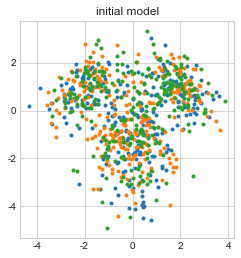

In [37]:
K = 3
d = 2
n = simData.shape[0]
z_init = rng.integers(K, size=n)
plot_mixGaussian_data(simData, z_init, "initial model")
ws = np.eye(K)[z_init]
iters = 100
mus_history = np.zeros((iters, K, d))
Sigmas_history = np.zeros((iters, K, d, d))
pis_history= np.zeros((iters, K))
logLiks_history = np.zeros(iters)
for i in range(iters):
    mus, Sigmas, pi = m_step(simData, ws)
    ws, ll = e_step_naive(simData, mus, Sigmas, pi)
    mus_history[i, :, :] = mus
    Sigmas_history[i, :, :, :] = Sigmas
    pis_history[i,:] = pi
    logLiks_history[i] = ll

In [40]:
for iter_ in  np.arange(0, iters, 10):
    _, _, zend = e_step_hard_assignment(simData, mus_history[iter_,:], Sigmas_history[iter_,:,:], pis_history[iter_,:])
    print(simData.shape)
    plot_mixGaussian_data(simData, zend, "iteration: " + str(iter_) +" logLik: "+ str(round(logLiks_history[iter_],3)))

(800, 2)
(800, 2)
(800, 2)
(800, 2)
(800, 2)
(800, 2)
(800, 2)
(800, 2)
(800, 2)
(800, 2)


####  Task 2.6 E step in log-space

It is more efficient and numerically stable to calculate probabilities in log-space. Now re-implement the above method E-step in log-space. The method should now instead return the log-likelihood of the dataset.

Hint: note that if we take log to the E-step we have 

$$\left (\ln \pi_k + \ln N(x^i; \mu_k, \Sigma_k)\right ) - \ln \left (\sum_{j=1}^K \exp \left \{\ln \pi_j +\ln N(x^i; \mu_j, \Sigma_j\right \}\right )$$

And the a numerical stable way to calculate the log transformed denumerator is to use `logsumexp` (which is imported for you; check its implementation for details if you want to know more). The E step also returns $\texttt{logLik}$: the log-likelihood of the model given the input parameters. Remember the log-likelihood for mixture of Gaussians is defined as 
\begin{align*}\log P(D| \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K\})&=\log \prod_{i=1}^n P(x^i| \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K) \\ 
&= \sum_{i=1}^n \log P(x^i| \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K) = \sum_{i=1}^n \log \sum_{k=1}^K \exp\left \{\ln \left (\pi_k N(x^i; \mu_k, \Sigma_k)\right )\right \},
\end{align*} You need to figure out how the log likelihood can be calculated based on the above equation.

In [ ]:
def e_step_log_space(data, μ, Σ, π):
    K, d = μ.shape 
    logLiks = np.array([mvn.logpdf(data, mean= μ[k,], cov= Σ[k,:,:]) for k in range(K)]).transpose()
#   fill the rest here
    return ws, logLik

After implementing the code, you should test the method on the simulated dataset with the true parameters. 

In [ ]:
#  ws_, logLik_=e_step_log_space(simData, trueμs, trueΣs, trueπs);